# Introduction to Simple Linear Regression: Evaluation

## Learning Objectives and outcomes

- $R^{2}$ - score for a linear regression

- Discussion of statsmodel output for a linear regression.

- Assumptions of linear regression

- Interpretting significance and p_values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# read data to a dataframe
data = pd.read_csv('data/Advertising.csv', index_col=0)[['TV', 'Sales']]

print(data.shape)
data.head()

(200, 2)


,TV,Sales
1,230.1,22.1
2,44.5,10.4
3,17.2,9.3
4,151.5,18.5
5,180.8,12.9


## (From this morning) Linear Regression with `statsmodels`

There is another library that we can use for linear models which is `statsmodels`.  `statsmodels` is much more robust than `sklearn` for linear models, but is much less extensible.

- [check the documentation](http://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS)

- Now let's use statsmodel to fit a linear model to our data.

In [2]:
import statsmodels.api as sm

__Your Turn__

- Try to use statsmodel library to fit a line to the advertising dataset.

In [5]:
data.head()

,TV,Sales
1,230.1,22.1
2,44.5,10.4
3,17.2,9.3
4,151.5,18.5
5,180.8,12.9


In [9]:
X = data['TV'].values
y = data['Sales'].values

In [18]:
X = X.reshape(-1 ,1)
X.shape

(200, 1)

In [19]:
model = sm.OLS(y, X, hasconst=False)

In [20]:
results=model.fit()

In [21]:
results.params

array([0.08324961])

In [22]:
results.predict([150, 2, 3])

array([12.48744131,  0.16649922,  0.24974883])

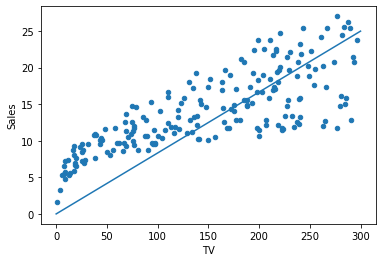

In [31]:
data.plot(x='TV', y='Sales', kind='scatter')
x_pred = np.linspace(0, 300, 150)
plt.plot(x_pred, results.predict(x_pred))

In [32]:
X = sm.add_constant(X)

In [35]:
model = sm.OLS(y, X, hasconst=True)
results = model.fit()
results.params

array([7.03259355, 0.04753664])

In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           1.47e-42
Time:                        15:03:08   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
x1             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=False)
lr.fit(X, y)
lr.coef_

array([7.03259355, 0.04753664])

## Understanding $R^{2}$

Note that if we want to predict sales naively a good choice could be the means sales.

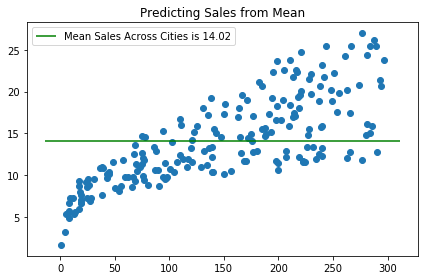

In [18]:
plt.scatter(X, y)
xmin, xmax = plt.xlim()

plt.hlines(y=y.mean(),
           xmin=xmin, xmax=xmax,
           label='Mean Sales Across Cities is %.2f' % y.mean(), color='green')

plt.title('Predicting Sales from Mean')

plt.legend()

plt.tight_layout()

But as we can see this is not explaining what is going on in the data very well. We know this amount of errors as Total Sum of Squares.


$$ \text{Total Sum of Squares} = \sum\limits_{i=1}^{200} (y_{i} - \bar{y})^{2} $$

In [69]:
y_bar = y.mean()

TSS = sum((y - y_bar)**2)

print(TSS)

5417.148749999998


But after we fit a linear regression line we have a better fit than just "mean"

In [73]:
y_pred = fitted_model.predict(Xconst)

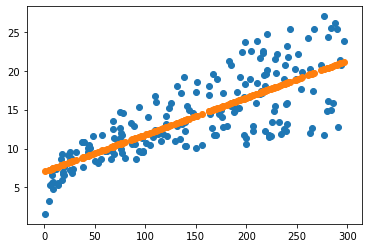

In [74]:
# this plots the actual data.
plt.scatter(X, y)

# this plots the 'best' line
plt.scatter(X, y_pred)

As we can see this line is also not 'perfect' from prediction point of view. Let's see how much is the total amount of error this time.

$$ \text{Squared Sum of Residuals} = \sum\limits_{i=1}^{200} (y_i - \text{y_pred}_{i})^{2}$$

In [76]:
residuals = y - y_pred

## We will be 
RSS = sum(residuals**2)

RSS

2102.5305831313503

In [79]:
print('Total Squared Sum  is %.3f '%TSS)
print('Residual Squared Sum is %.3f'%RSS)

Total Squared Sum  is 5417.149 
Residual Squared Sum is 2102.531


$R^{2}$ measurement is just their ratio:

 $$ R^{2} = \frac{TSS - RSS}{TSS} $$

In [82]:
R_squared = (TSS - RSS)/TSS

R_squared

0.611875050850071

## Using `statsmodels.api`  - $R^2$ and Making Predictions

In [55]:
X = data.drop(columns='Sales') #use dataframe to keep it two dimensional 
X['intercept'] = 1 #add 1 for hasconst
y = data.Sales

In [56]:
# we first construct our model
model = sm.OLS(y, X, hasconst=True)

# by fitting we learn 'best' coefficients for intercept and slope
fitted_model = model.fit()


# with summary method we can see all the relevant statistics.
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           1.47e-42
Time:                        15:12:12   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0475      0.003     17.668      0.000       0.042       0.053
intercept      7.0326      0.458     15.360      0.000       6.130       7.935
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Suppose our company wants to invest $230K in TV ads in a city, how much sales would you expect on average for this city?

In [58]:
fitted_model.params

TV           0.047537
intercept    7.032594
dtype: float64

In [59]:
fitted_model.predict([230, 1])

array([17.96602085])

In [67]:
intercept = fitted_model.params[1]

slope = fitted_model.params[0]

Note that this prediction is noting but 

$$ \text{Sales} = 0.0475 \times 230 + 7.0326 $$

In [68]:
our_prediction = slope * 230 + intercept * 1
our_prediction

17.96602084872224

## Now with `sklearn`

In [69]:
from sklearn.linear_model import LinearRegression

In [75]:
lr = LinearRegression()

In [77]:
X = X.drop(columns='intercept')

In [78]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
# best slope value slope
m = lr.coef_

In [80]:
m

array([0.04753664])

In [81]:
## best intercept value
b = lr.intercept_

In [82]:
b

7.032593549127693

In [83]:
y_pred = m*X + b

Text(0, 0.5, 'Sales in thosands of units')

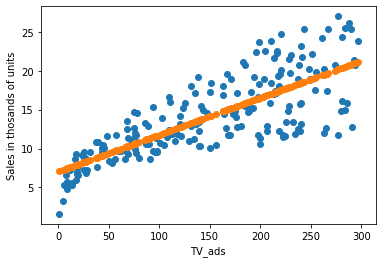

In [84]:
plt.scatter(X, y)
plt.scatter(X, y_pred)

plt.xlabel('TV_ads')

plt.ylabel('Sales in thosands of units')

In [85]:
from sklearn.metrics import r2_score

In [86]:
r2_score(y, y_pred)

0.611875050850071

## P values and Significance

- To clarify the difference between population parameters and the estimates from data we will work with simulated data in this section.

In [87]:
# Here we will work with a toy case
# note that y ≈ 3X + 5 so we know population parameters in this case.
# irr_error is random error due to some measurement errors.

X = np.random.uniform(low=0, high=10, size=100)
irr_error = np.random.normal(loc=0, scale=1, size=100)

y = 3*X + 5 + irr_error

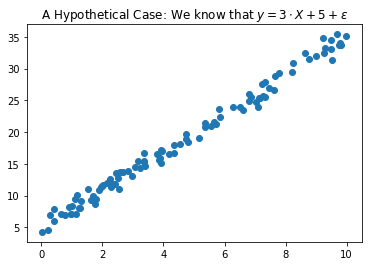

In [88]:
plt.scatter(X,y)
plt.title('A Hypothetical Case: We know that $y = 3 \cdot X + 5 + \epsilon$')
plt.show()

__Your Turn!__ Use sklearn to fit 100 linear models for the data X, y above. Don't forget to add random error each time. The idea is each time we sample from a population we will have some variation inevitably.

In [89]:
coef_list_b0 = []
coef_list_b1 = []
for i in range(1000):
    X = np.random.uniform(low=0, high=10, size=100)
    irr_error = np.random.normal(loc=0, scale=1, size=100)
    y = 3*X + 5 + irr_error
    X = X.reshape(-1, 1)
    lr = LinearRegression()
    lr.fit(X, y)
    coef_list_b0.append(lr.intercept_)
    coef_list_b1.append(lr.coef_[0])

Now let's look at distributions of $\hat{b}_{0}$ and $\hat{b}_{1}$:

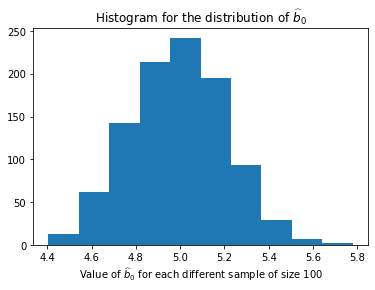

In [90]:
plt.hist(coef_list_b0)
plt.title("Histogram for the distribution of $\widehat{b}_{0}$")
plt.xlabel("Value of $\widehat{b}_{0}$ for each different sample of size 100")
plt.show()

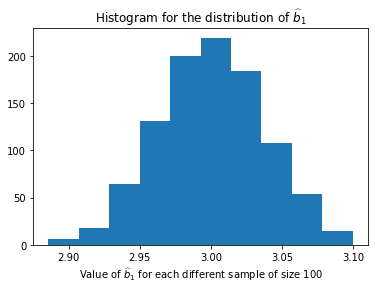

In [91]:
plt.hist(coef_list_b1)
plt.title("Histogram for the distribution of $\widehat{b}_{1}$")
plt.xlabel("Value of $\widehat{b}_{1}$ for each different sample of size 100")
plt.show()

## Further Reading <a name='further_reading'></a>

- [What is the parameter copy_X in sklearn](https://stackoverflow.com/questions/52541717/what-is-the-parameter-copy-x-in-sklearn-linear-regression)

- https://newonlinecourses.science.psu.edu/stat501/node/252/

- https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

- https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

- https://lagunita.stanford.edu/assets/courseware/v1/e4f2f4823252ead8c1a68722e3415c28/c4x/HumanitiesSciences/StatLearning/asset/linear_regression-handout.pdf